In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17063, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 17063 (delta 21), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17063/17063), 15.68 MiB | 18.76 MiB/s, done.
Resolving deltas: 100% (11716/11716), done.
/content/yolov5


In [ ]:
%reset -f

In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 26.4 MB/s eta 0:00:00


In [ ]:
import torch
from IPython.display import Image, clear_output
from utils.downloads import attempt_download

if torch.cuda.is_available():
    device_properties = torch.cuda.get_device_properties(0)
    print(f"Setup complete. Using torch {torch.__version__} with GPU: {device_properties.name}")
else:
    print(f"Setup complete. Using torch {torch.__version__} on CPU.")


Setup complete. Using torch 2.5.1+cu121 with GPU: Tesla T4


In [ ]:
%ls /content/yolov5/utils

activations.py    aws/            downloads.py        __init__.py  plots.py
augmentations.py  callbacks.py    flask_rest_api/     loggers/     segment/
autoanchor.py     dataloaders.py  general.py          loss.py      torch_utils.py
autobatch.py      docker/         google_app_engine/  metrics.py   triton.py


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sHWNOWe1kXDnJ6YSHNRX")
project = rf.workspace("knu-jcqwu").project("collectpklotdata")
version = project.version(1)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to collectPKlotData-1 in yolov5pytorch:: 100%|██████████| 5630/5630 [00:02<00:00, 2474.15it/s]


In [ ]:
%pwd

'/content/yolov5'

In [ ]:
dataset.location

'/content/yolov5/collectPKlotData-1'

In [ ]:
!find /content -name "data.yaml"

/content/yolov5/collectPKlotData-1/data.yaml


In [ ]:
%cat /content/yolov5/collectPKlotData-1/data.yaml

names:
- '0'
- '1'
- car
- empty
- free
- occupied
nc: 6
roboflow:
  license: CC BY 4.0
  project: collectpklotdata
  url: https://universe.roboflow.com/project/collectpklotdata/dataset/1
  version: 1
  workspace: project
test: ../test/images
train: collectPKlotData-1/train/images
val: collectPKlotData-1/valid/images


In [ ]:
import yaml
with open(dataset.location + "/data.yaml", "r") as stream:
  num_classes = str(yaml.safe_load(stream)["nc"])

In [ ]:
with open(dataset.location + "/data.yaml", "r") as stream1:
  names = str(yaml.safe_load(stream1)["names"])
names

"['0', '1', 'car', 'empty', 'free', 'occupied']"

In [ ]:
!find /content -name "yolov5m.yaml"

/content/yolov5/models/yolov5m.yaml


In [ ]:
%cat /content/yolov5/models/yolov5m.yaml

# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.67 # model depth multiple
width_multiple: 0.75 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4],

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, "w") as f:
    f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5m.yaml
# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: {num_classes} # number of classes
depth_multiple: 0.67 # model depth multiple
width_multiple: 0.75 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)
  ]

In [ ]:
import os
os.environ["WANDB_MODE"] = "disabled"

In [ ]:
%%time
%cd /content/yolov5
!python train.py --img 412 --batch 8 --epochs 50 --data {dataset.location}/data.yaml --cfg ./models/custom_yolov5m.yaml --weights 'yolov5m.pt' --name yolov5m_results --cache

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      41/49      1.86G    0.03707    0.09684    0.02266        186        416:   9% 25/277 [00:03<00:36,  6.88it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      41/49      1.86G    0.03734    0.09787    0.02285        384        416:   9% 26/277 [00:03<00:36,  6.88it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      41/49      1.86G     0.0377    0.09946    0.02282        445        416:  10% 27/277 [00:04<00:37,  6.63it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

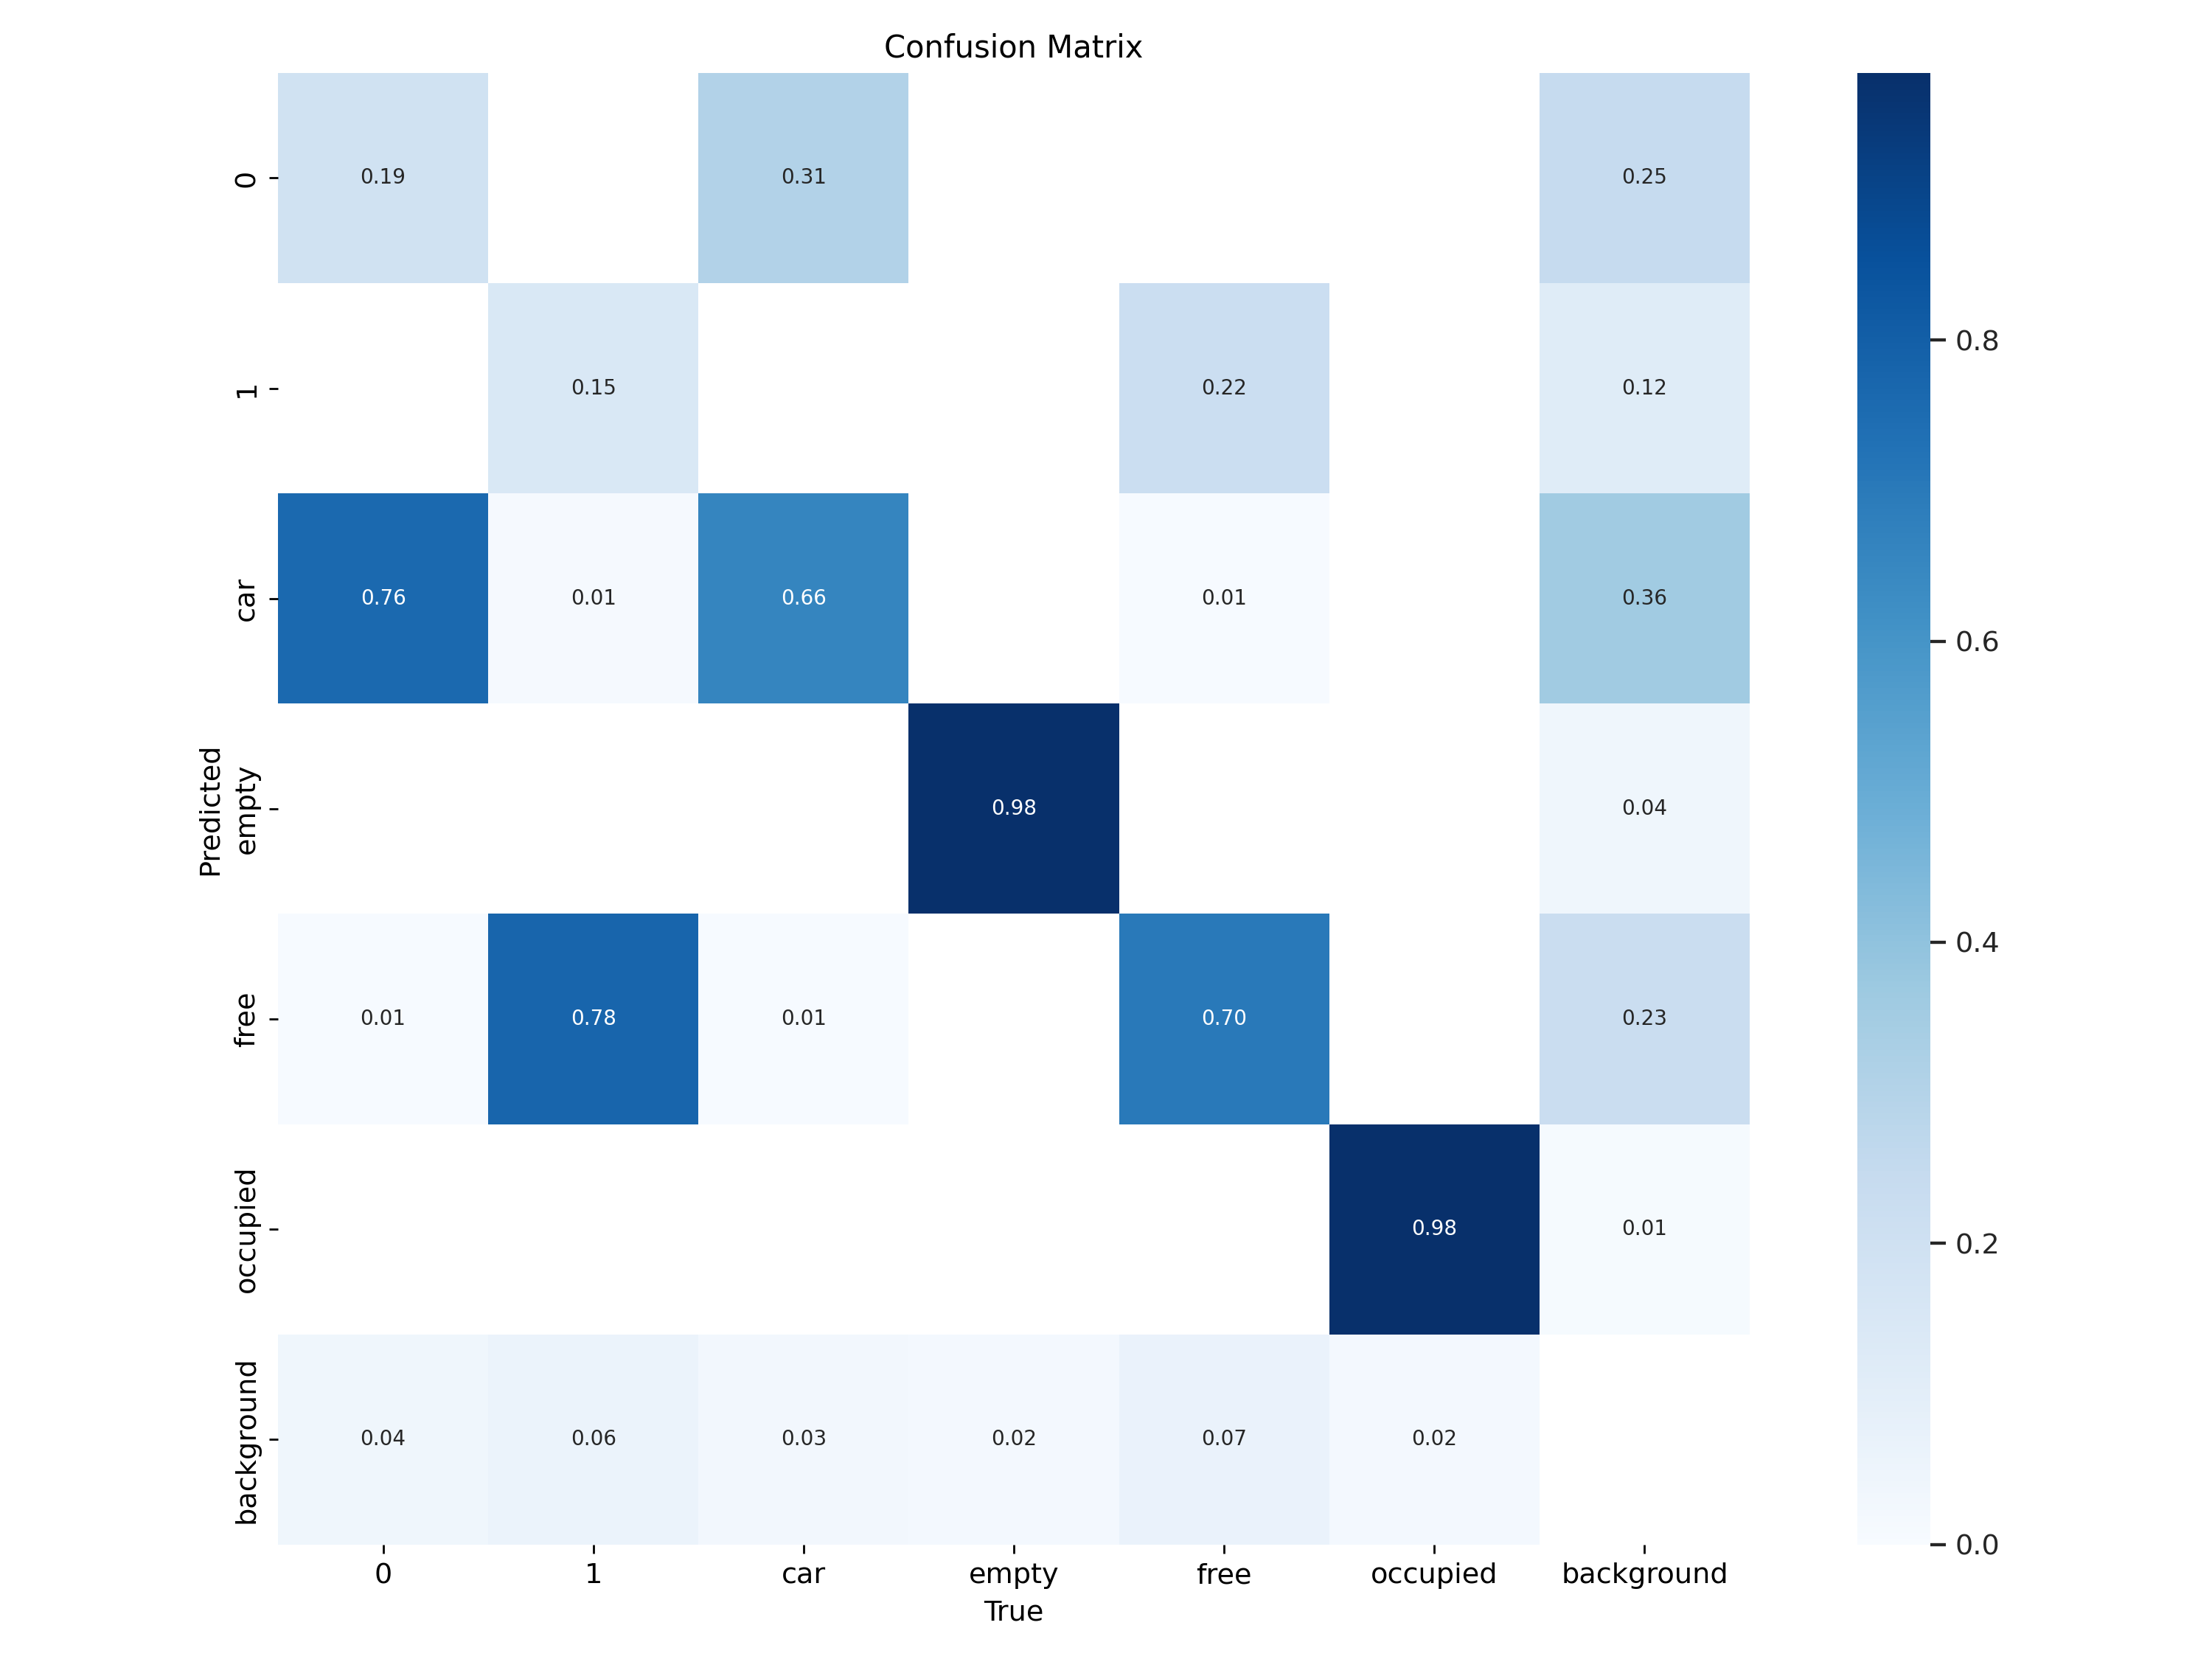

In [ ]:
Image(filename = "/content/yolov5/runs/train/yolov5m_results/confusion_matrix.png", width=500)

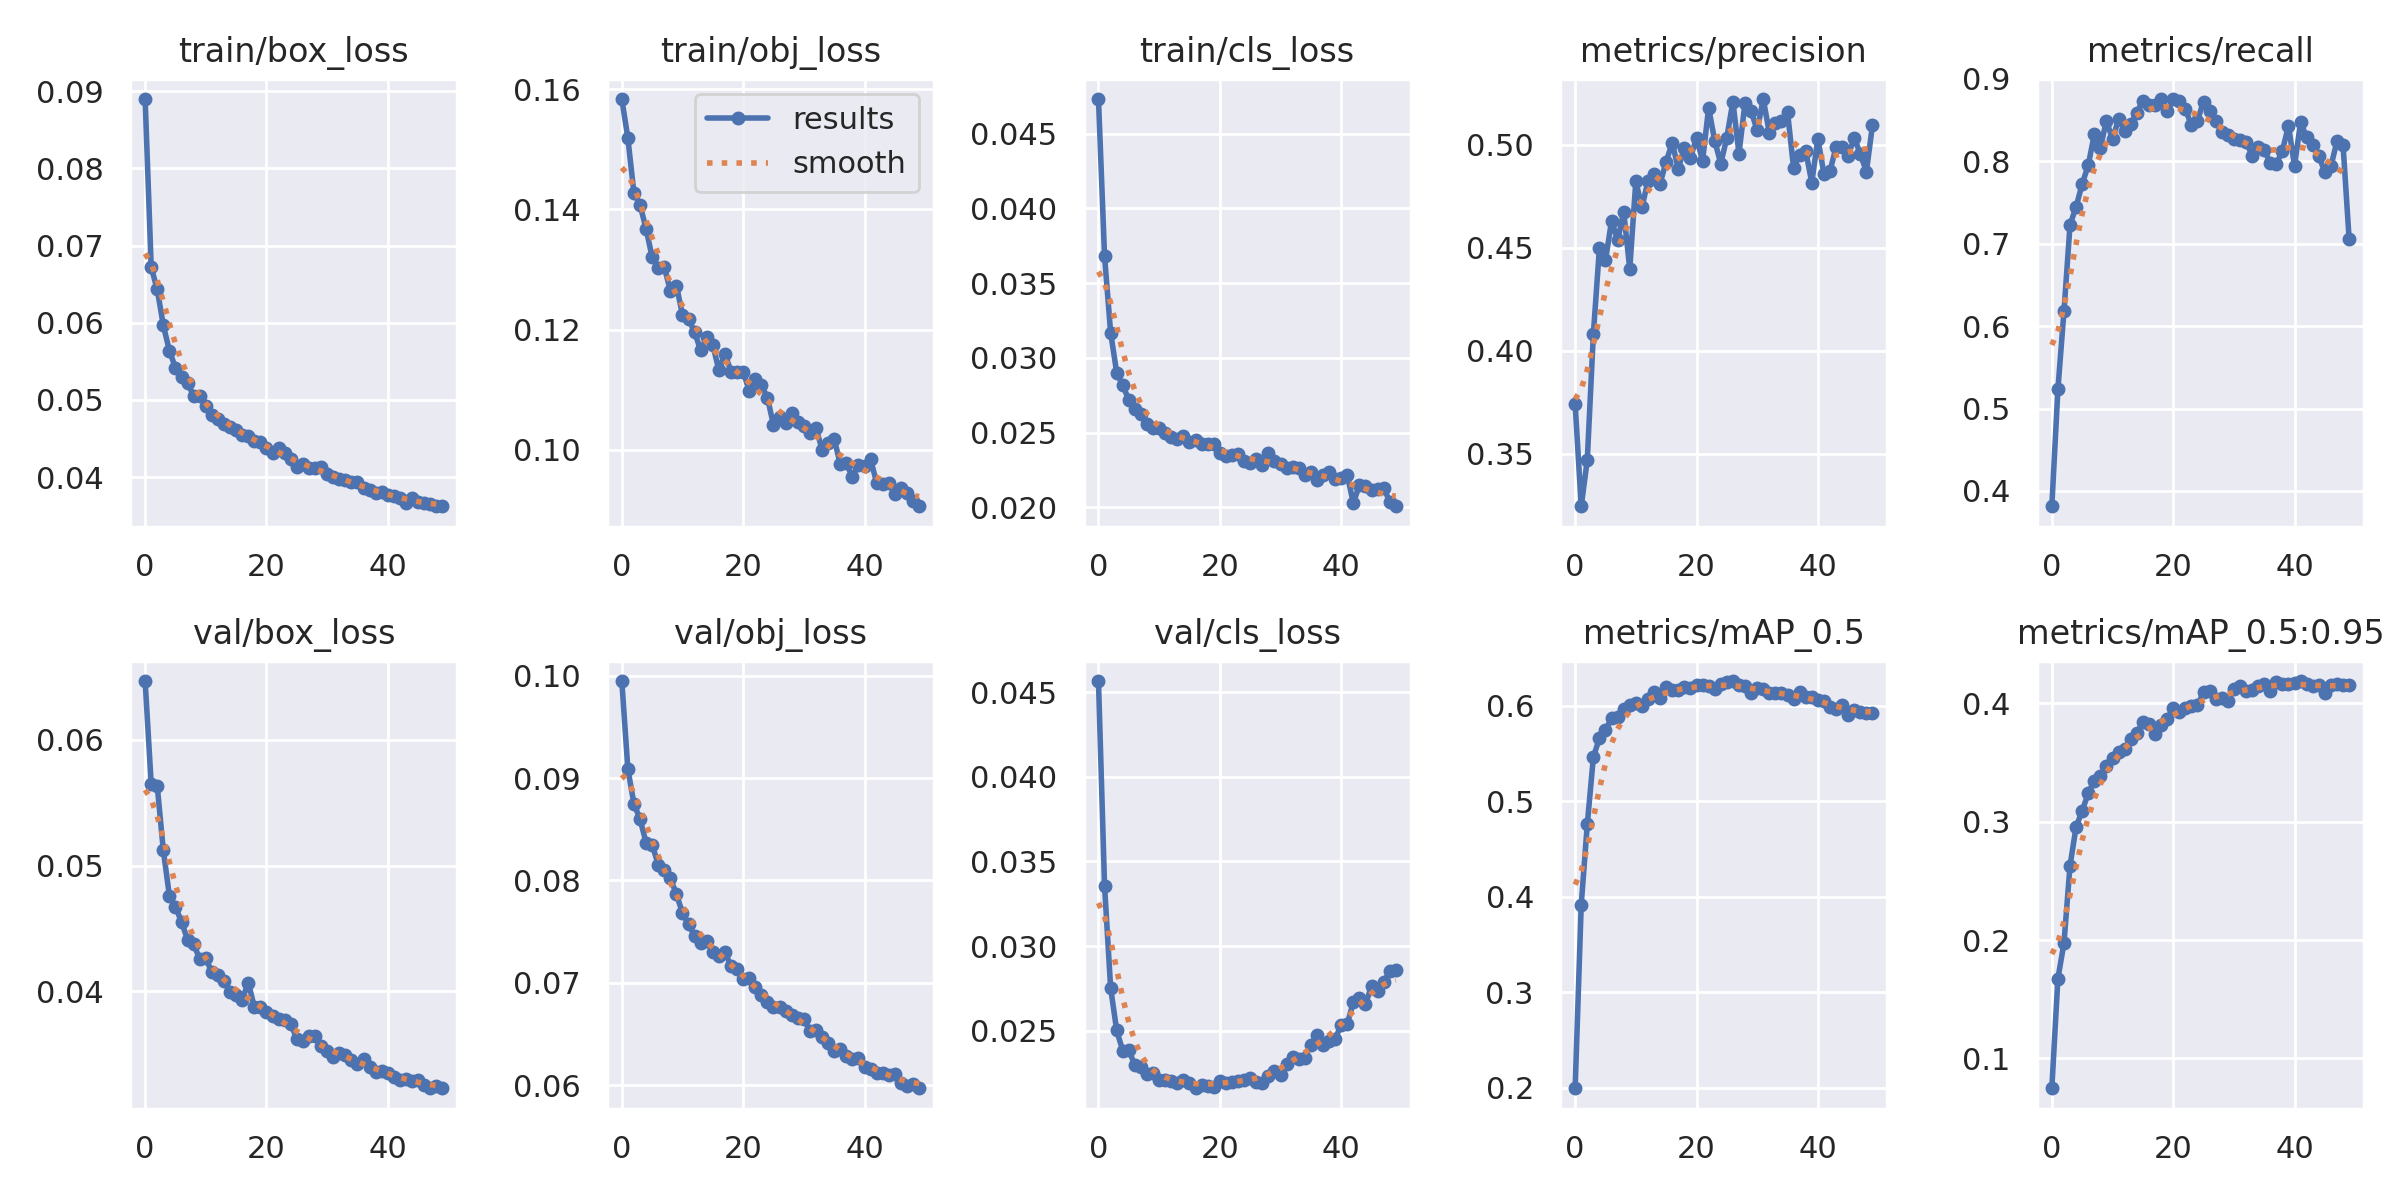

In [ ]:
Image(filename = "/content/yolov5/runs/train/yolov5m_results/results.png", width=500)

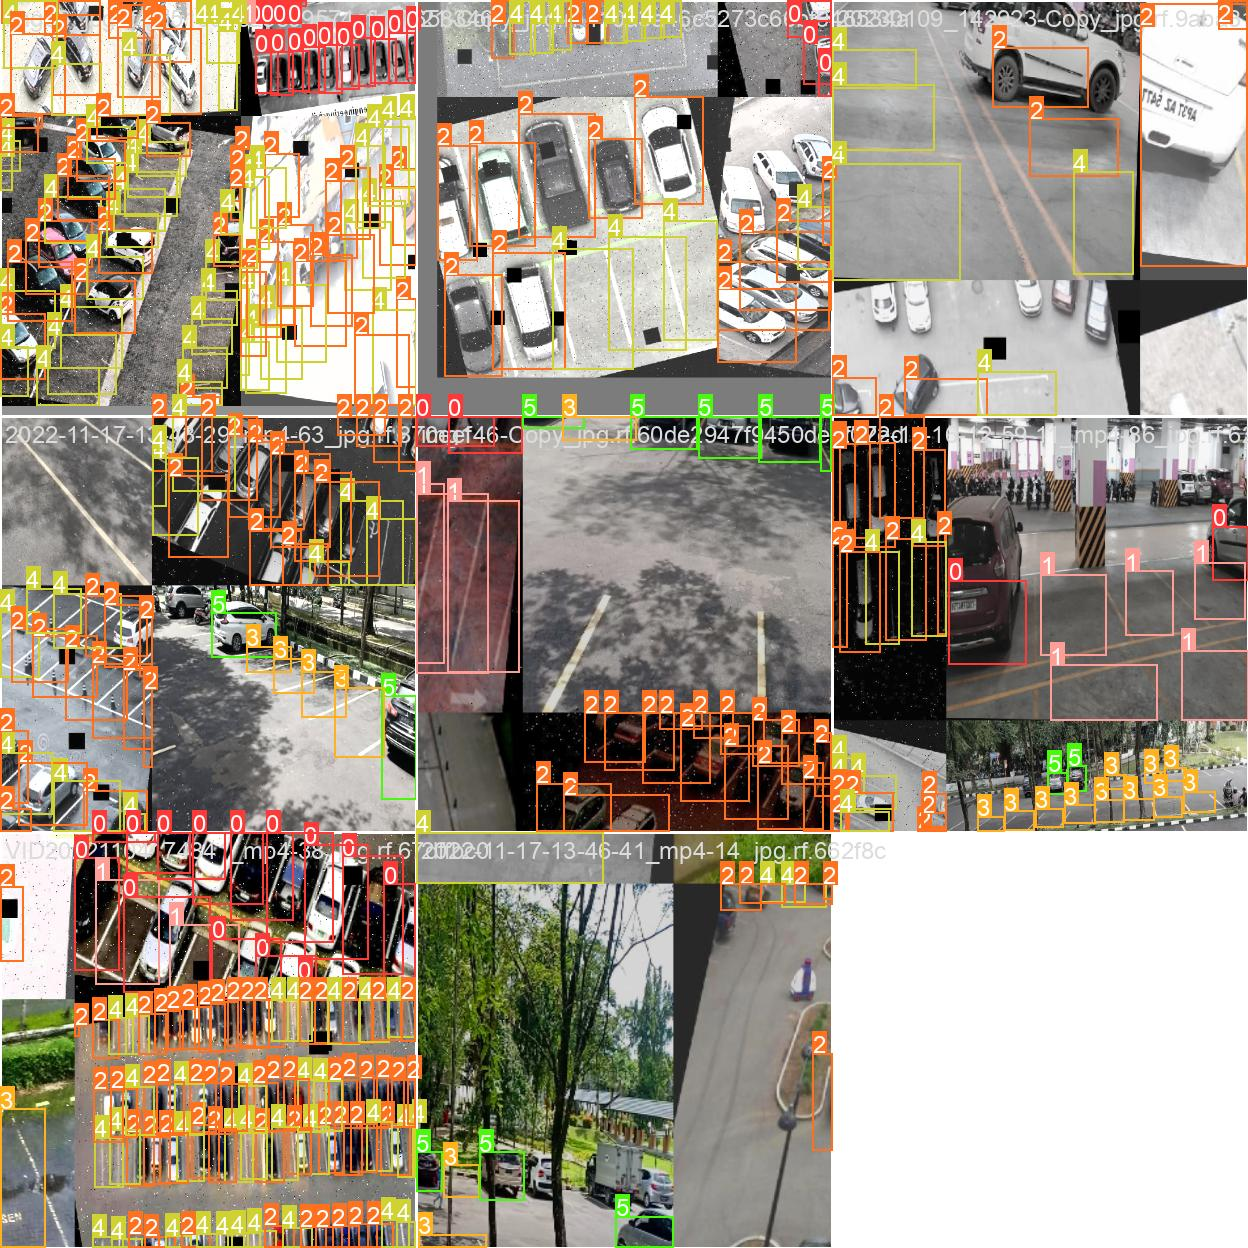

In [ ]:
Image(filename="/content/yolov5/runs/train/yolov5m_results/train_batch1.jpg", width=500)

In [ ]:
%ls /content/yolov5/runs/train/yolov5m_results/weights

best.pt  last.pt


In [ ]:
from google.colab import files
files.download('/content/yolov5/runs/train/yolov5m_results/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Copy the model to your Google Drive
!cp /content/yolov5/runs/train/yolov5m_results/weights/best.pt /content/drive/MyDrive/best.pt


Mounted at /content/drive


In [ ]:
%cd /content/yolov5
!python detect.py --weights /content/yolov5/runs/train/yolov5m_results/weights/best.pt --img 412 --conf 0.4 --source /content/yolov5/collectPKlotData-1/test/images

/content/yolov5
detect: weights=['/content/yolov5/runs/train/yolov5m_results/weights/best.pt'], source=/content/yolov5/collectPKlotData-1/test/images, data=data/coco128.yaml, imgsz=[412, 412], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-387-g4c904ac7 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 20873139 parameters, 0 gradients, 47.9 GFLOPs
WARNING ⚠️ --img-size [412, 412] must be multiple of max stride 32, updating to [416, 416]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/150 /content/yolov5/collectPKlotData-1/test/images/1-Copy-Copy_jpg.rf.29c6a0176b79ba8c77200cb

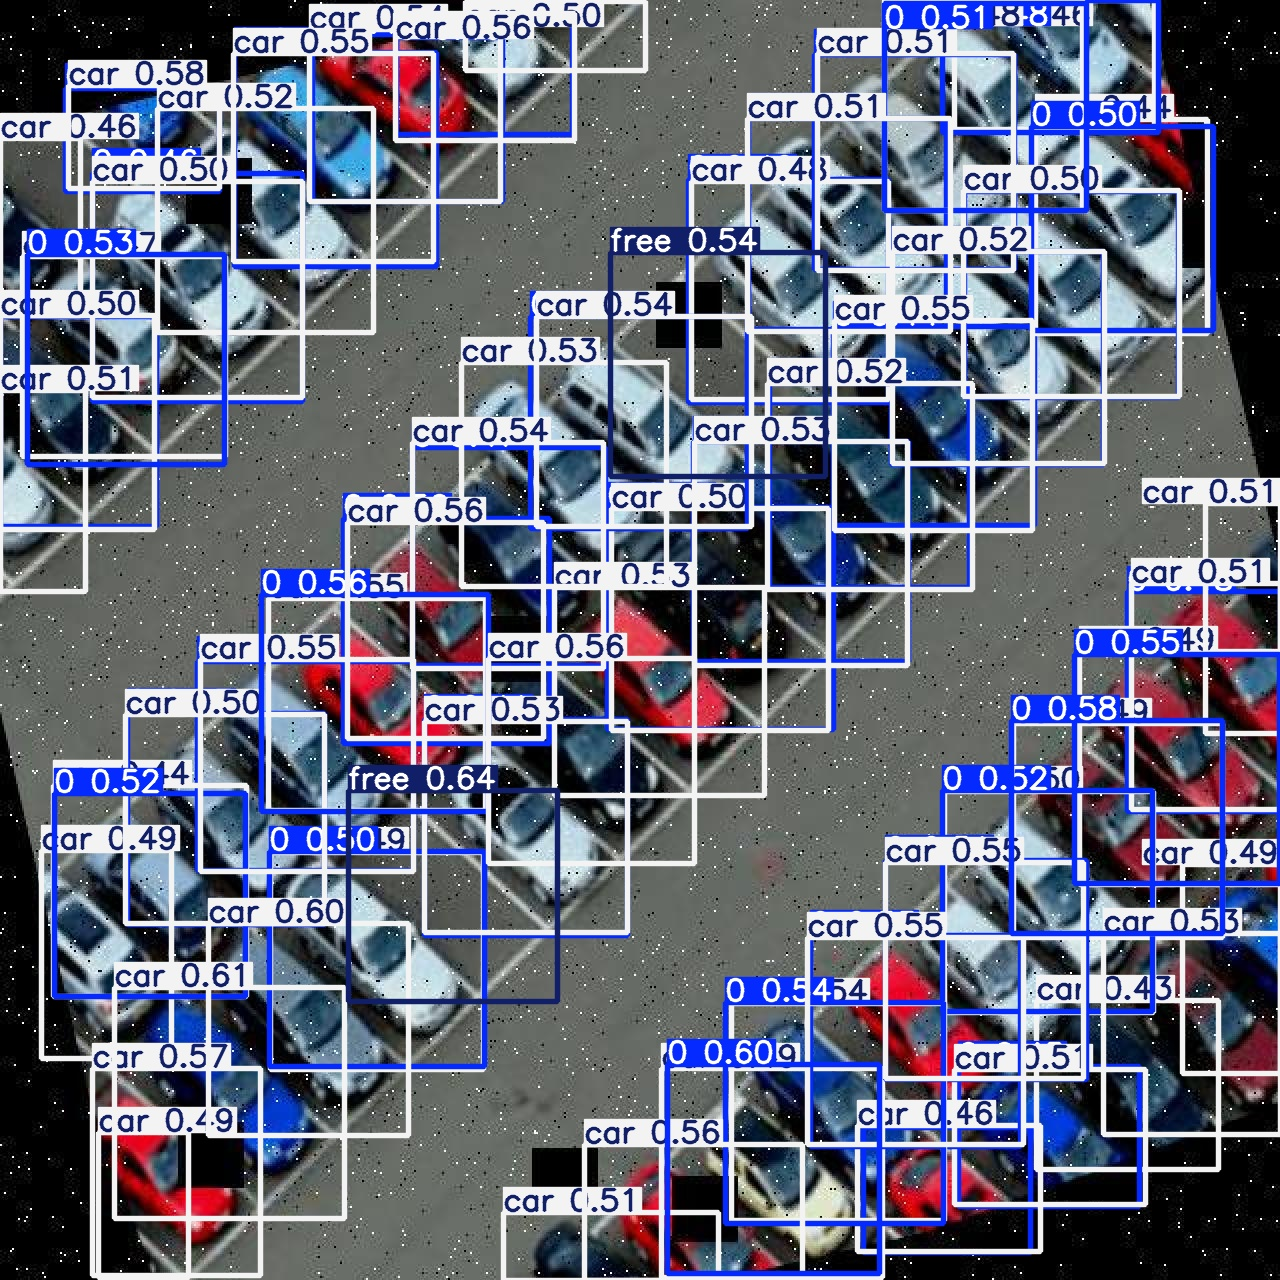

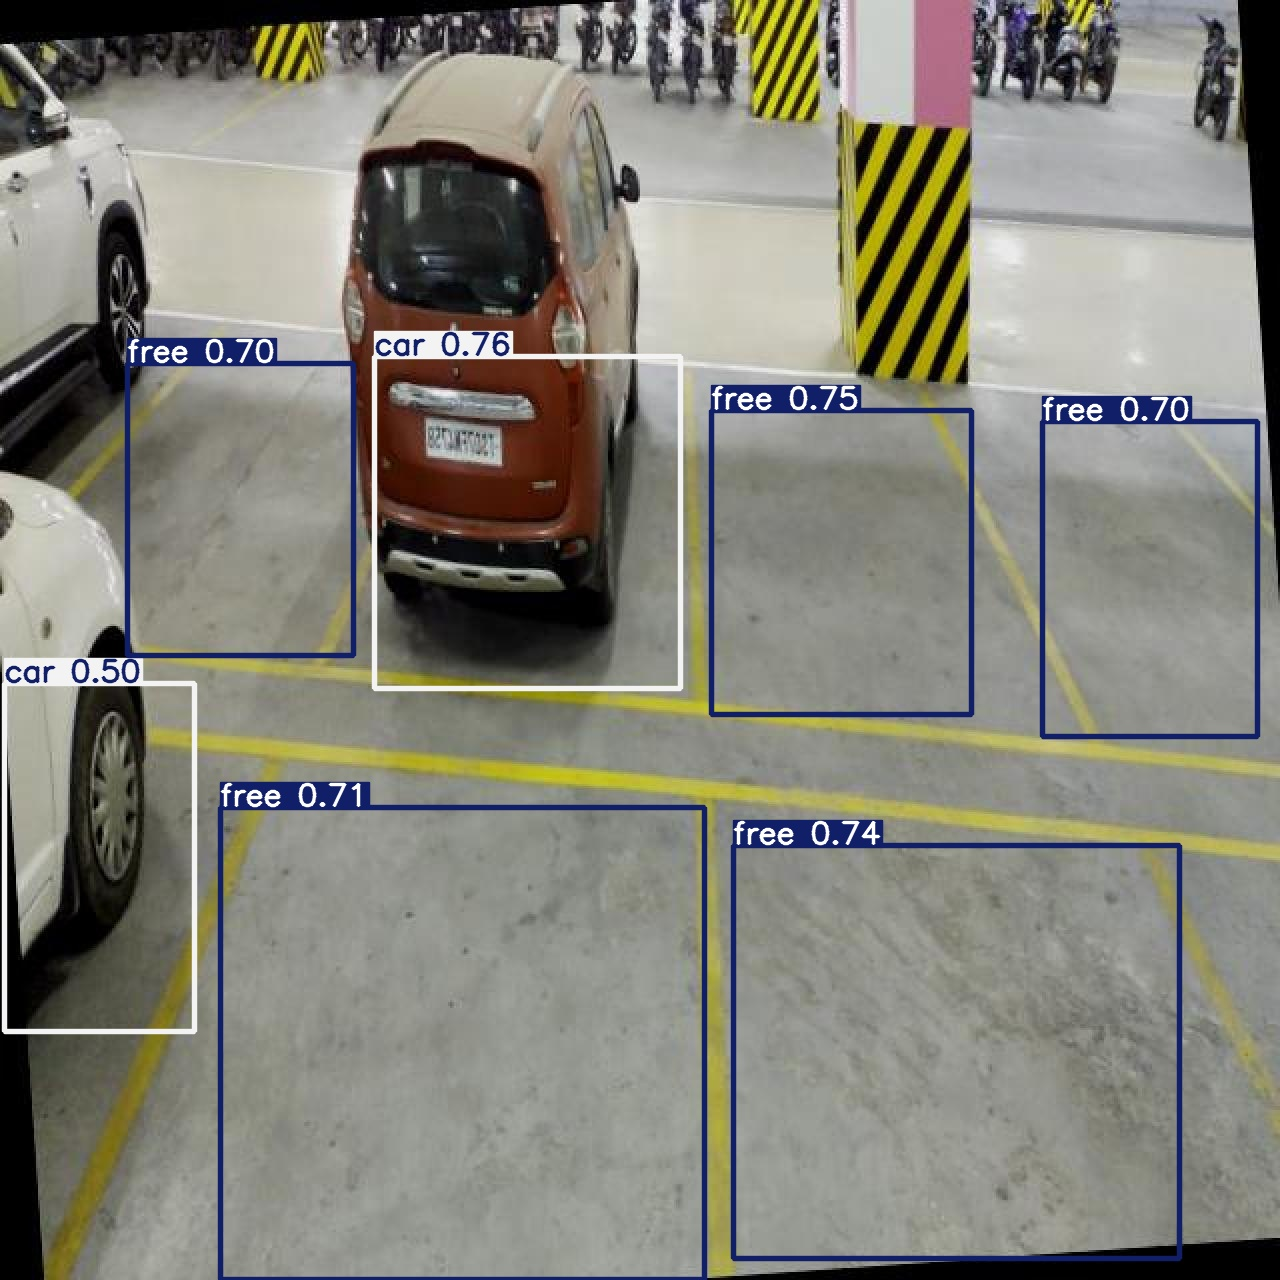

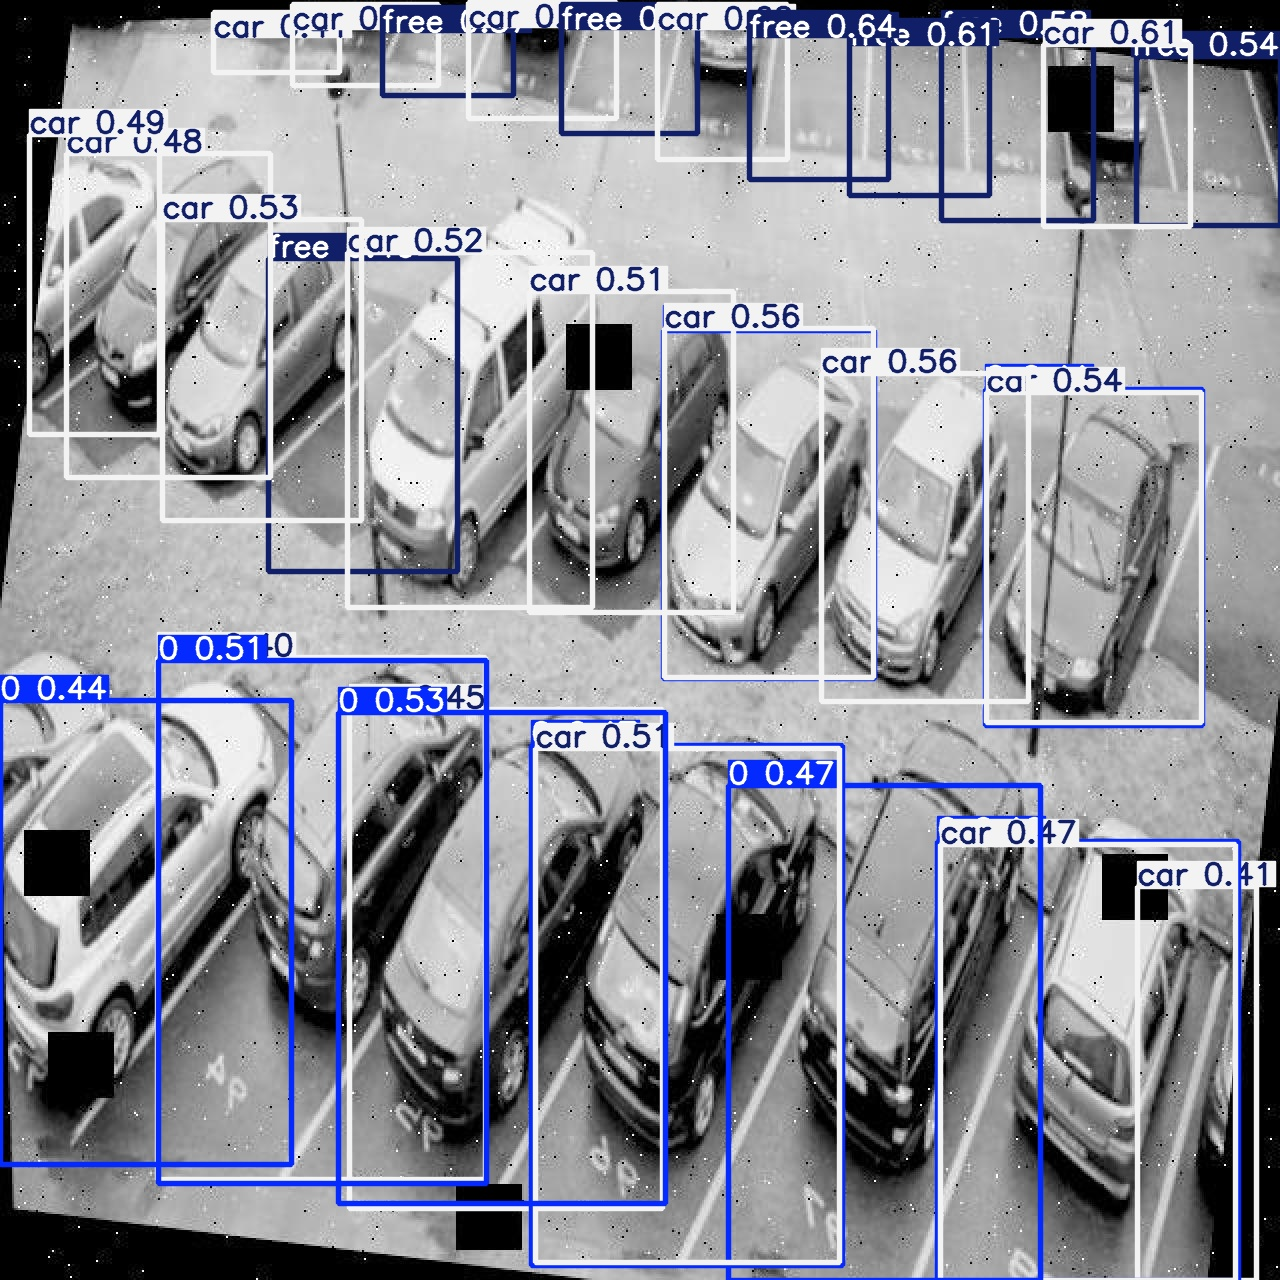

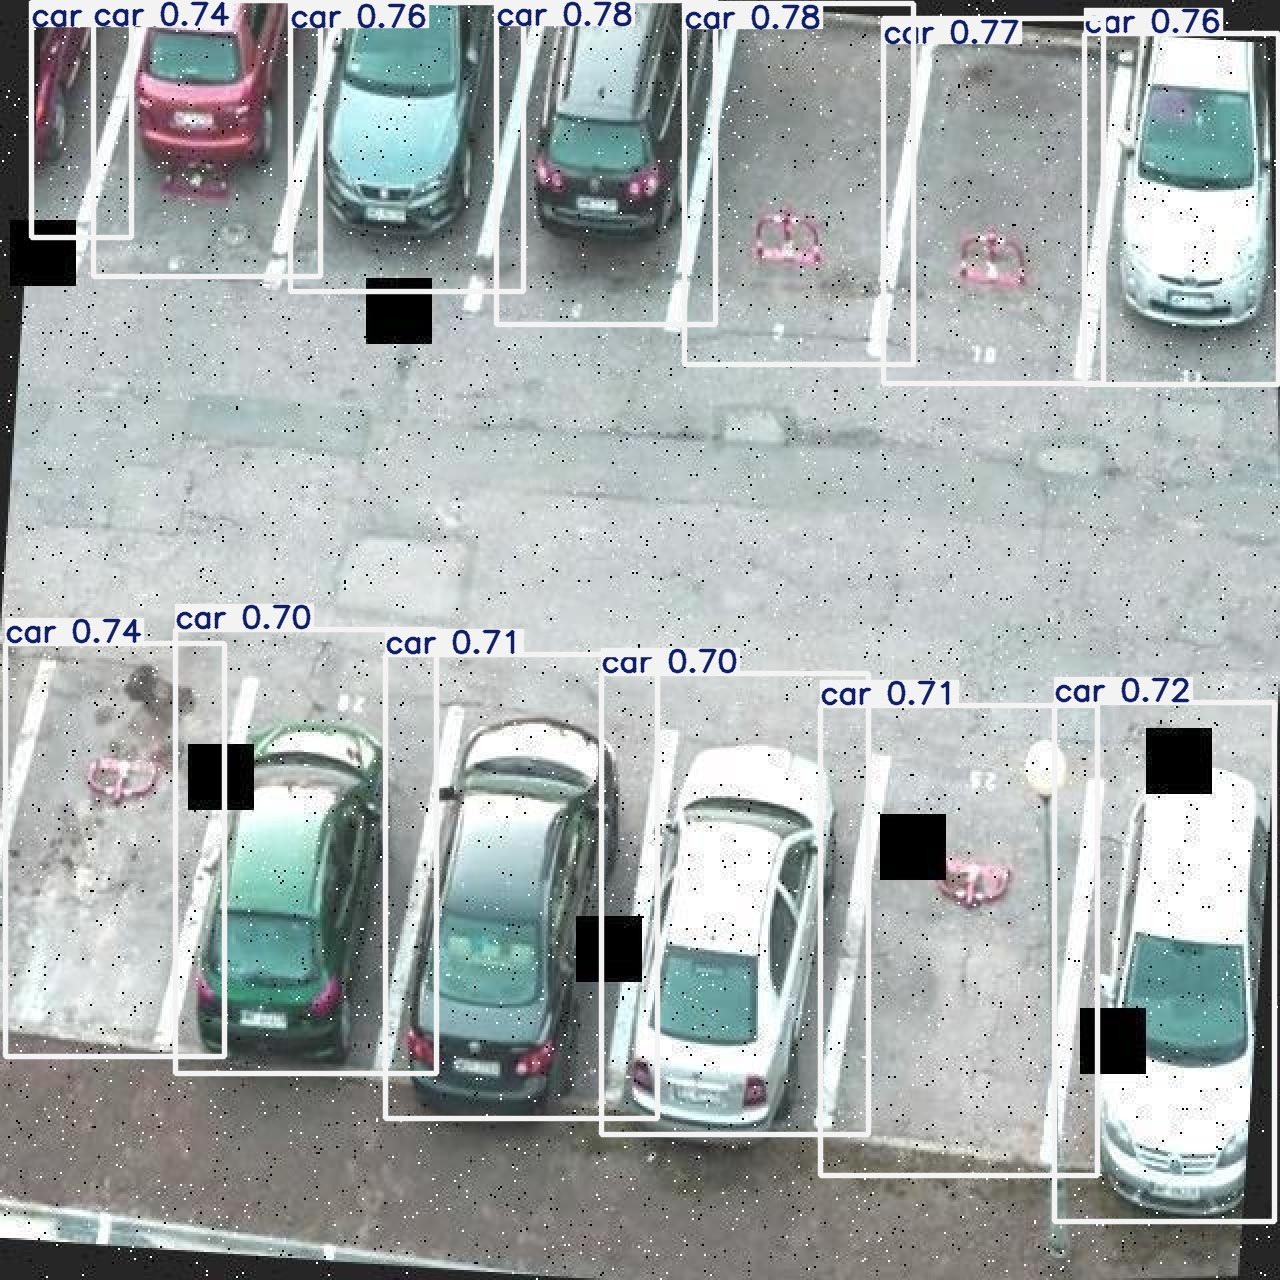

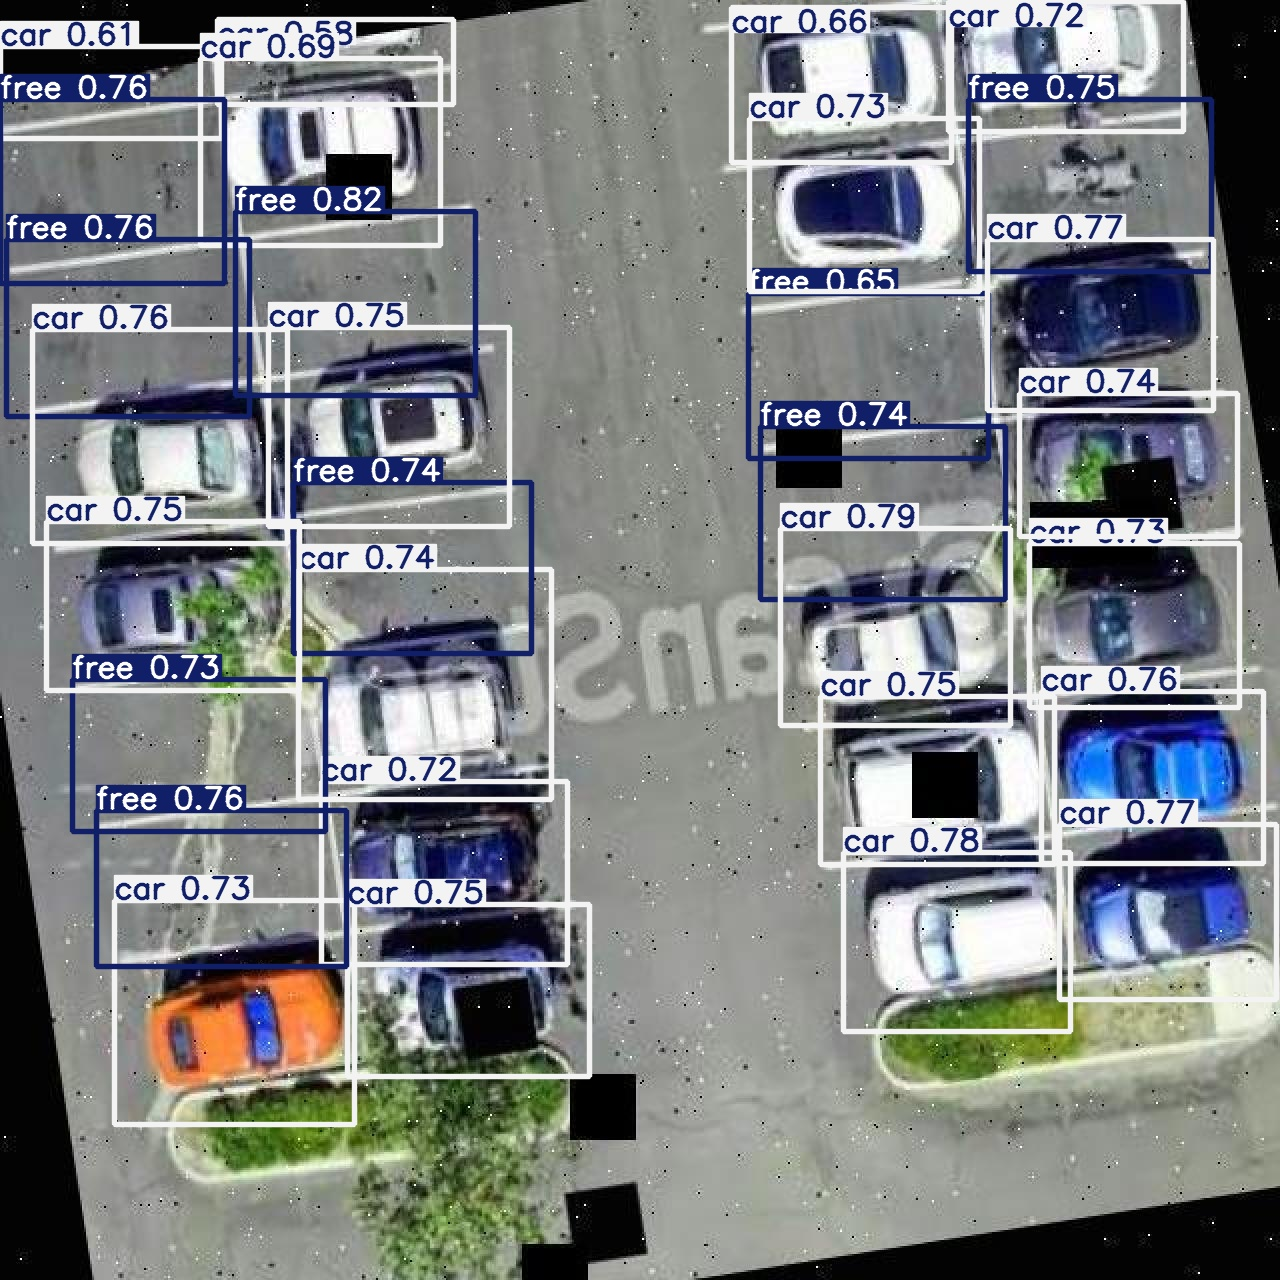

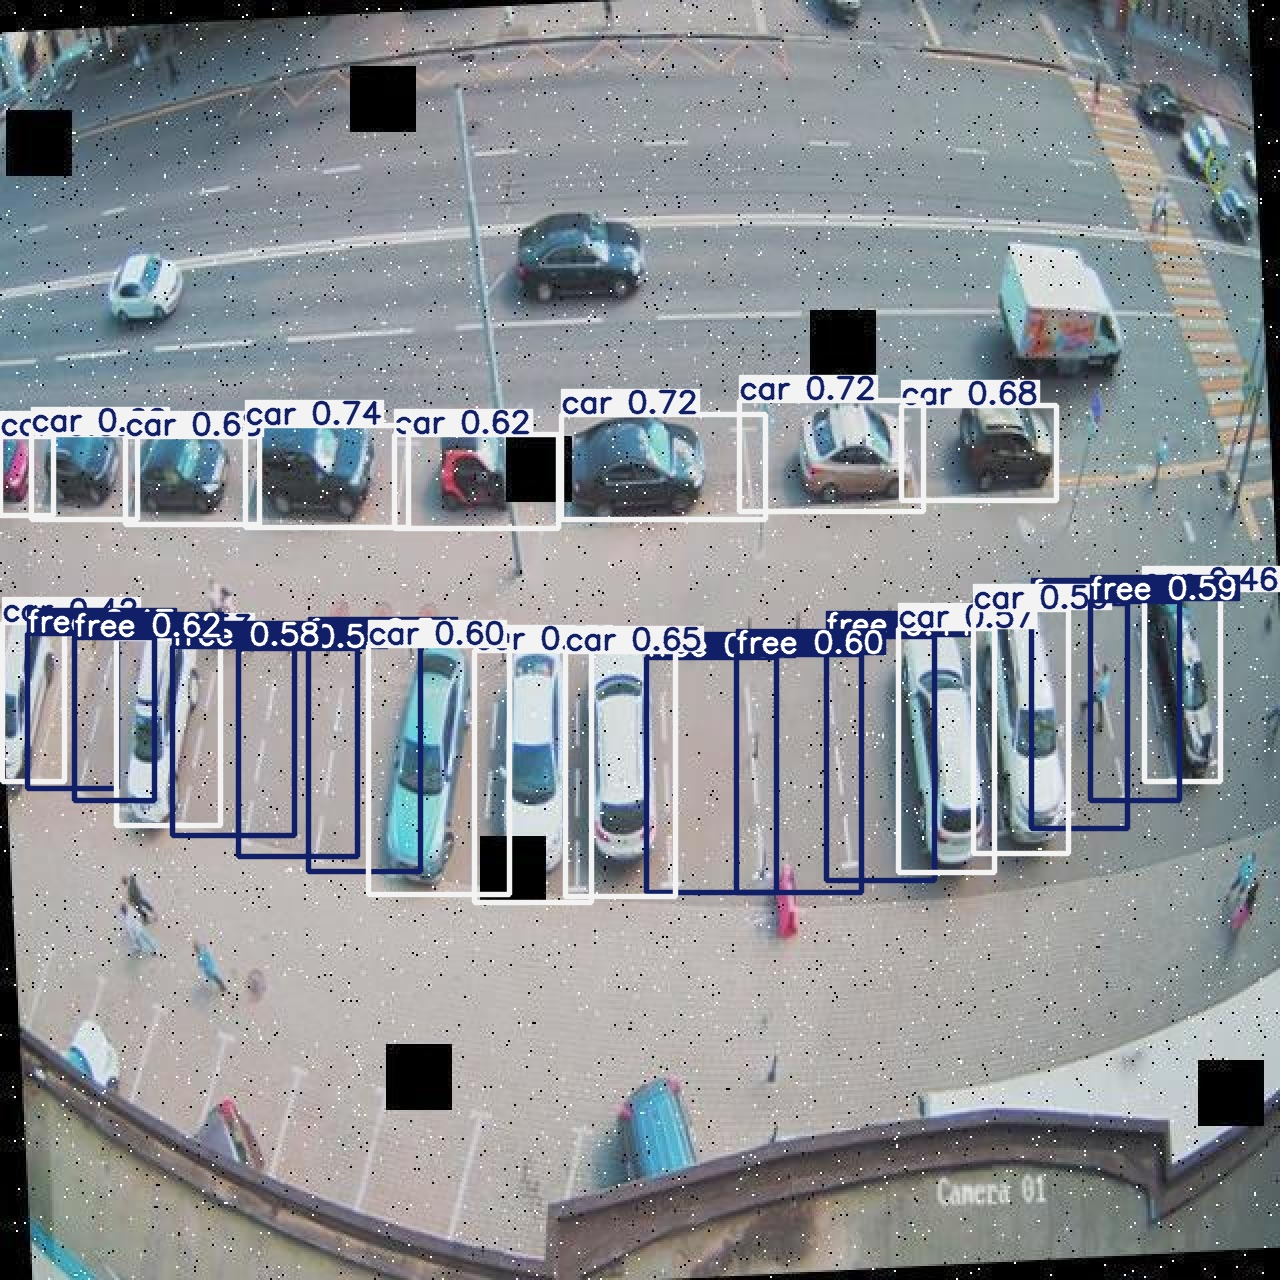

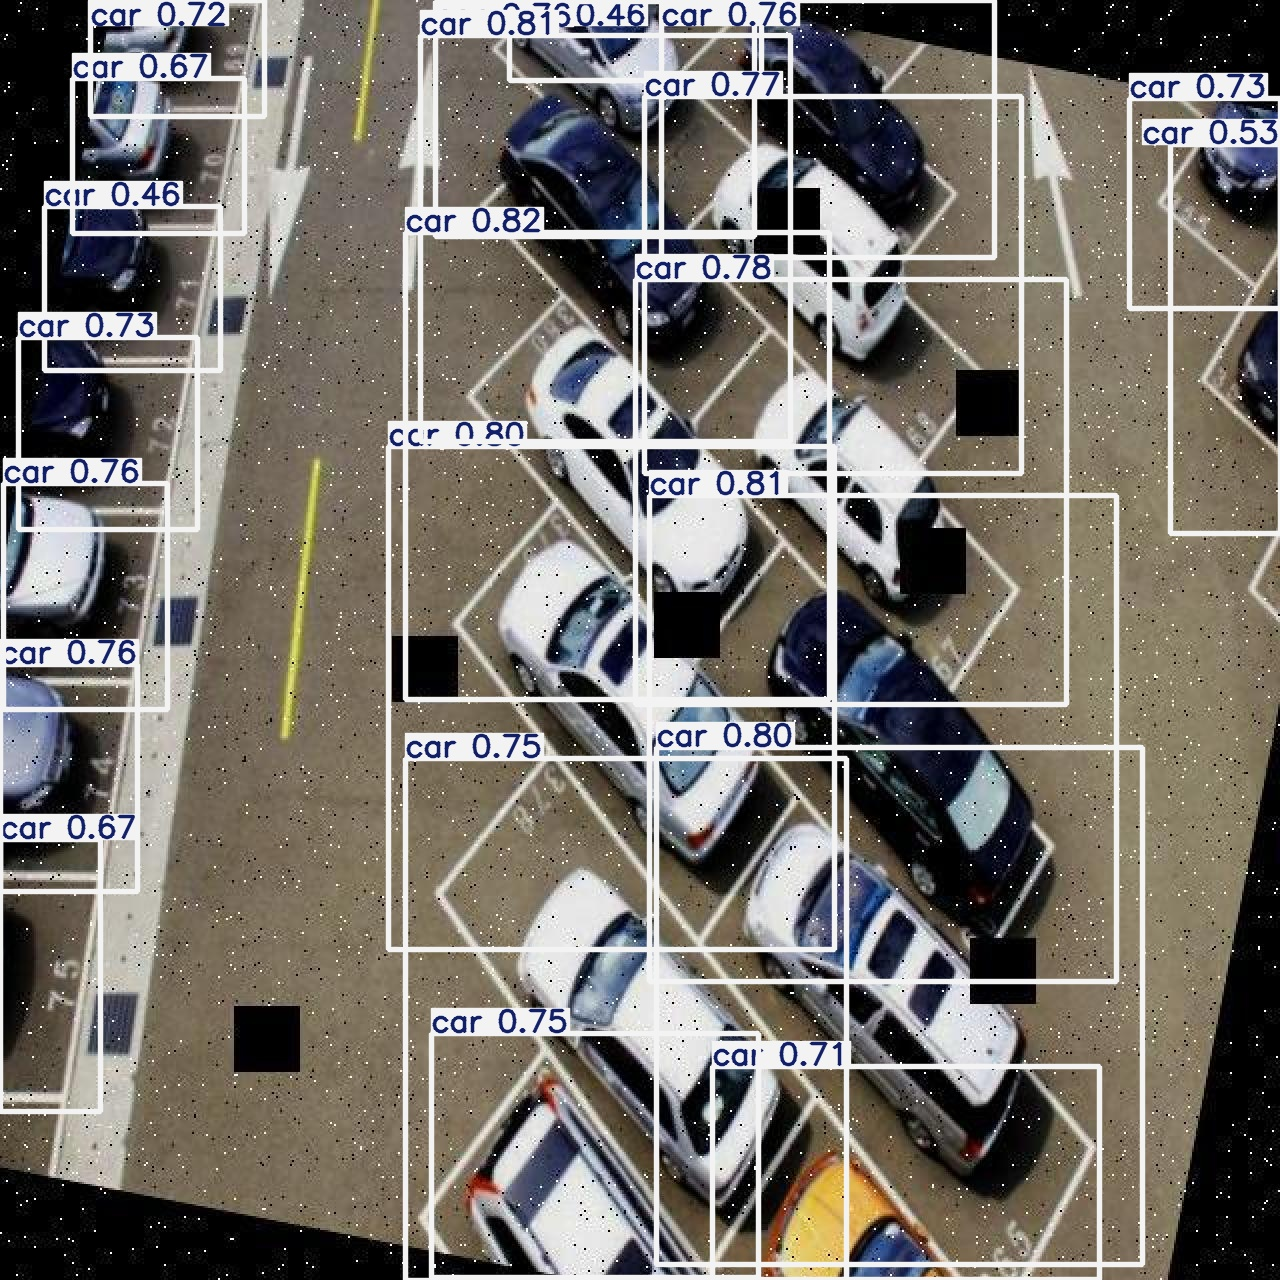

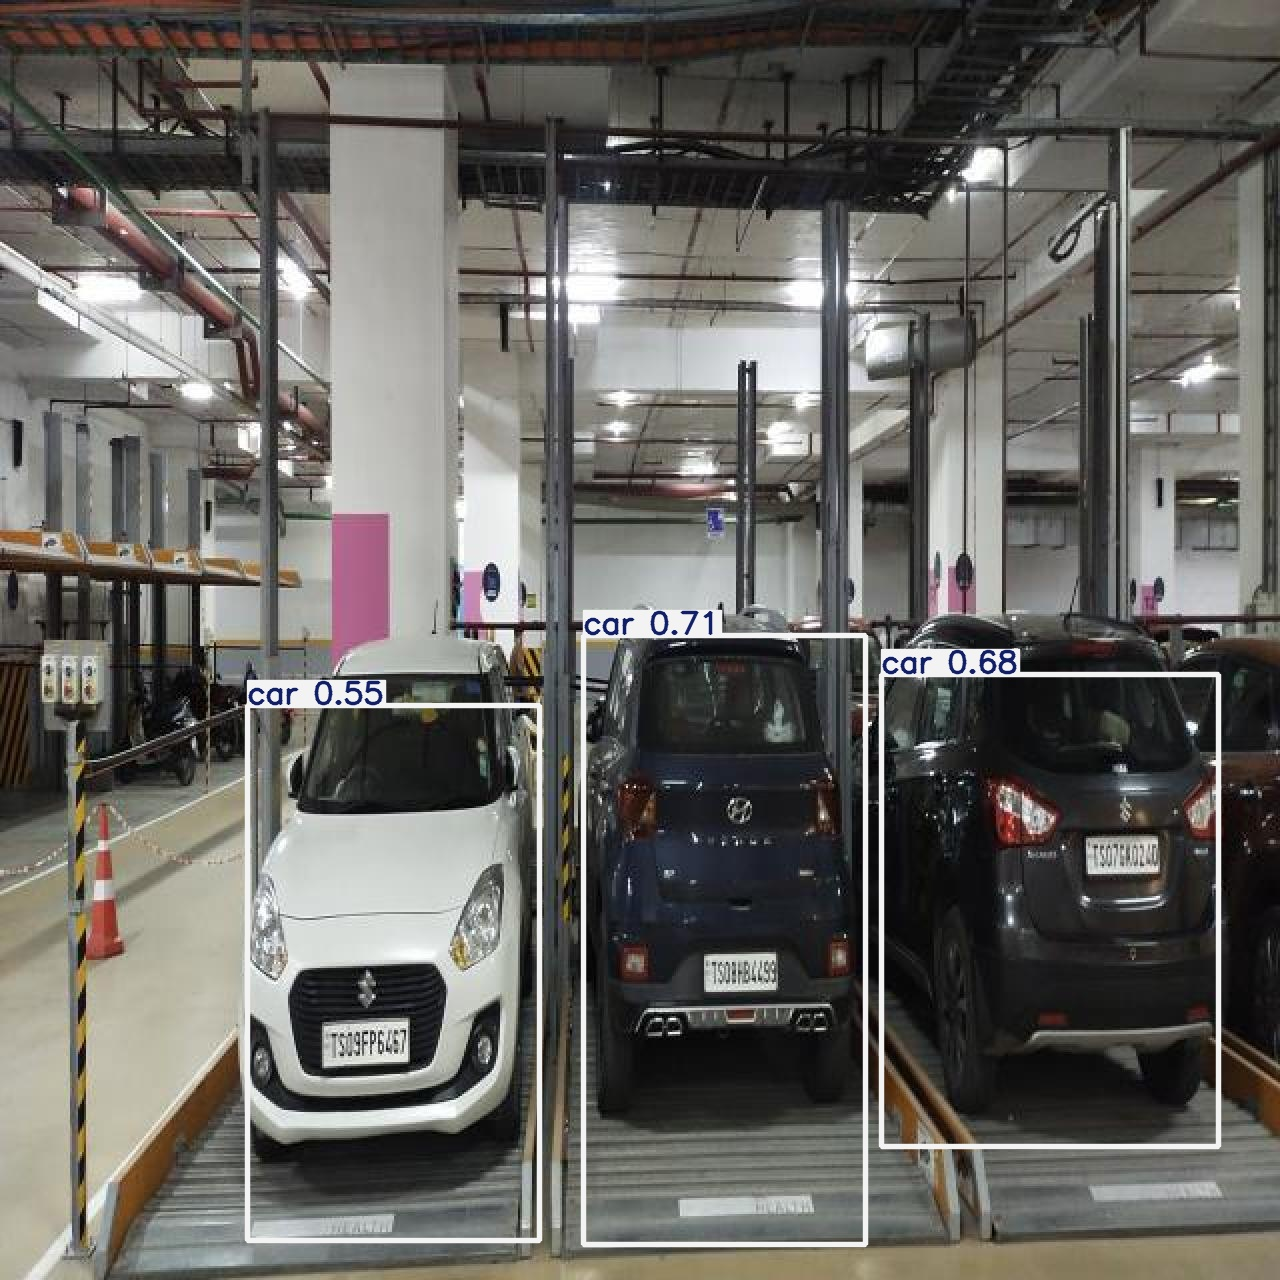

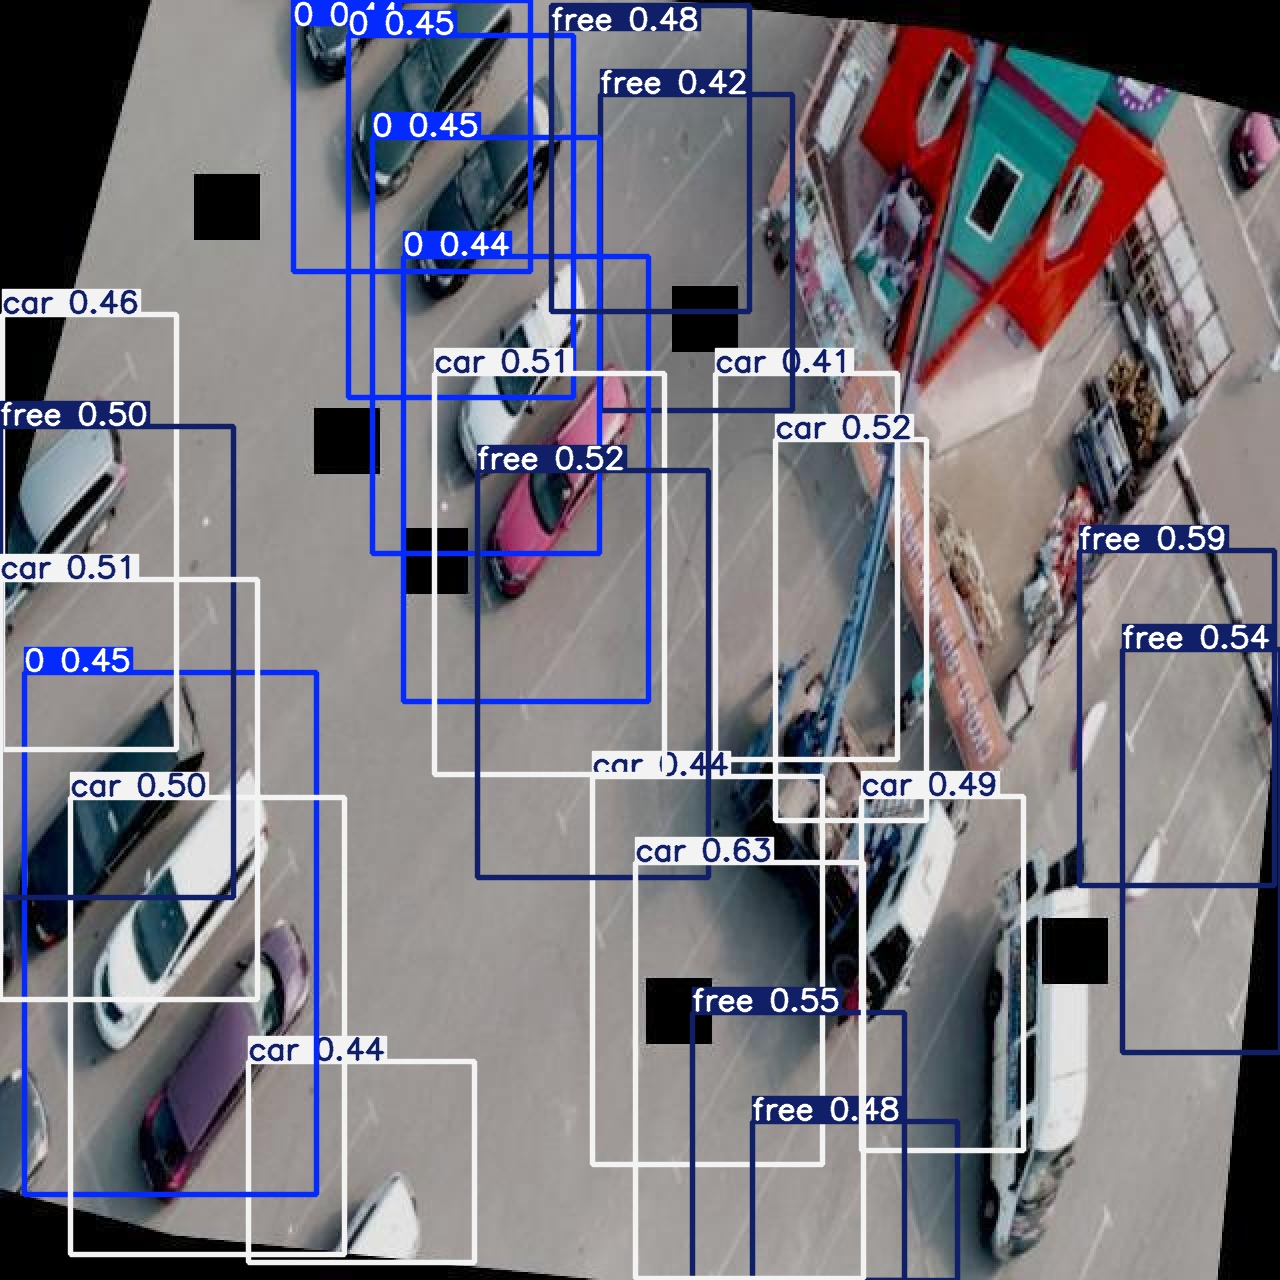

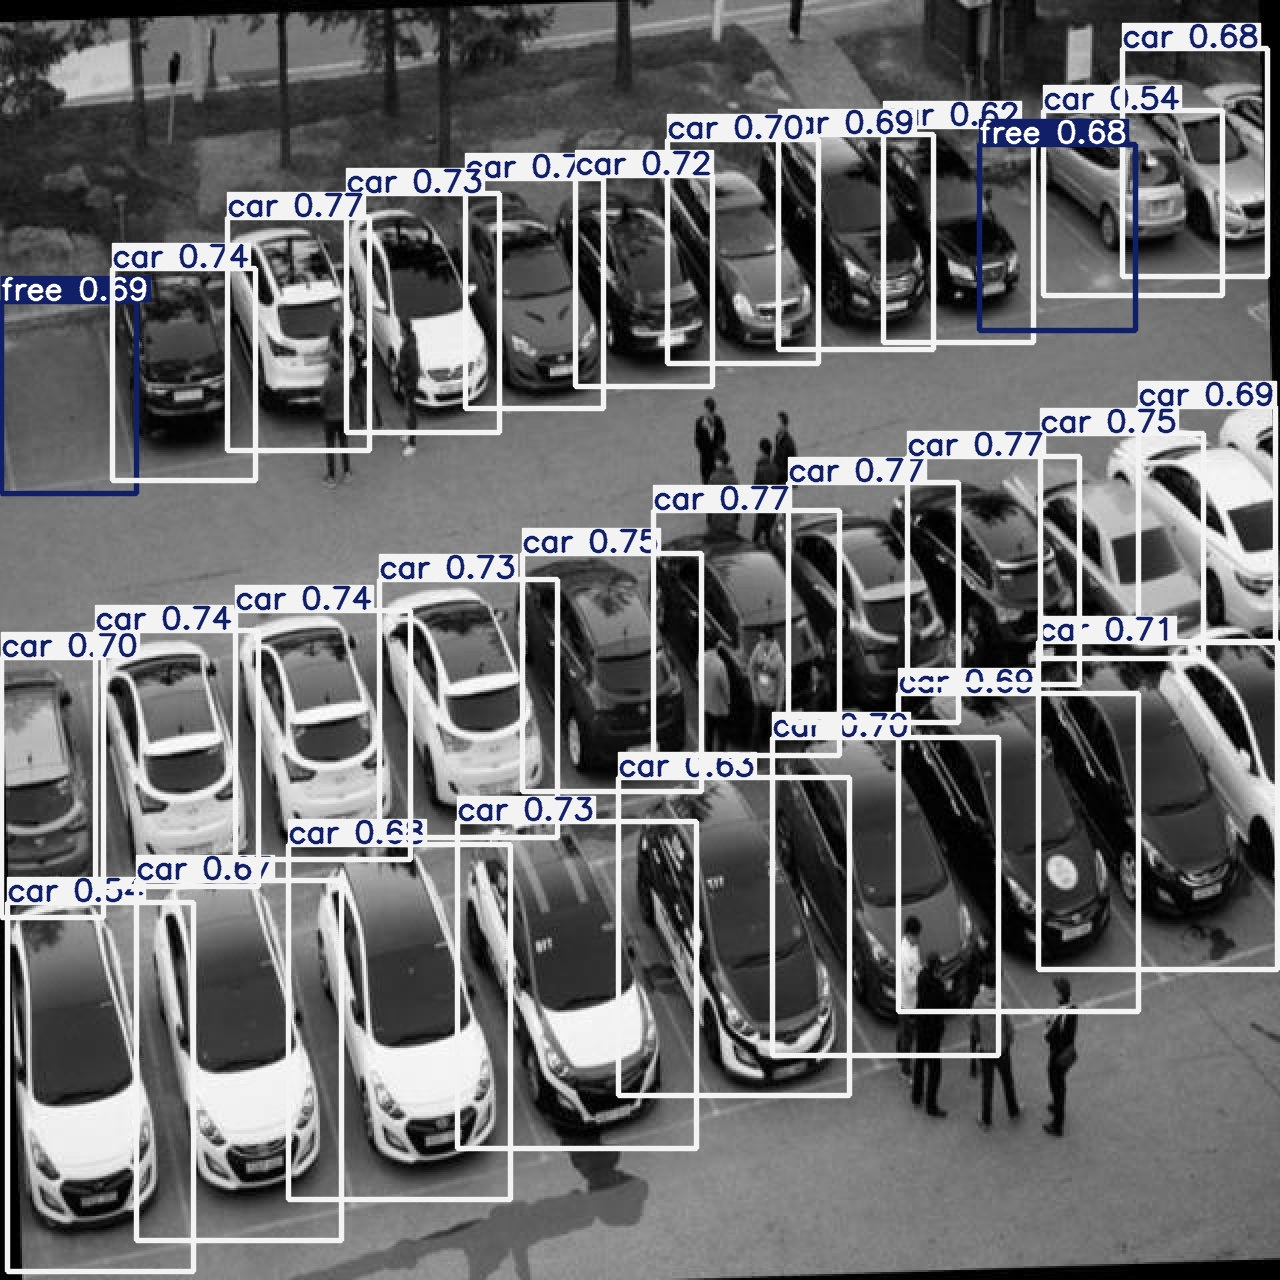

In [ ]:
import glob
from IPython.display import Image, display

# Ensure you point to the correct directory where the detection images are saved
image_path = "/content/yolov5/runs/detect/exp"  # Change exp if necessary

# Display first 10 images in the folder
for image_name in glob.glob(f"{image_path}/*.jpg")[:10]:
    display(Image(filename=image_name))

In [ ]:
!pip install ultralytics

In [ ]:
%cd /content/yolov5
!python detect.py --weights /content/yolov5/runs/train/yolov5m_results/weights/best.pt  --img 412 --conf 0.5 --source "/content/parking_1920_1080.mp4"

/content/yolov5
detect: weights=['/content/yolov5/runs/train/yolov5m_results/weights/best.pt'], source=/content/parking_1920_1080.mp4, data=data/coco128.yaml, imgsz=[412, 412], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-387-g4c904ac7 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 20873139 parameters, 0 gradients, 47.9 GFLOPs
WARNING ⚠️ --img-size [412, 412] must be multiple of max stride 32, updating to [416, 416]
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/849) /content/parking_1920_1080.mp4: 256x416 2 frees, 36.3ms
video 1/1 (2/849) /content/parking_1920_108

In [ ]:
%cd /content/yolov5
!python detect.py --weights /content/yolov5/runs/train/yolov5m_results/weights/best.pt  --img 412 --conf 0.5 --source "/content/parking1.mp4"

/content/yolov5
detect: weights=['/content/yolov5/runs/train/yolov5m_results/weights/best.pt'], source=/content/parking1.mp4, data=data/coco128.yaml, imgsz=[412, 412], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-387-g4c904ac7 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 20873139 parameters, 0 gradients, 47.9 GFLOPs
WARNING ⚠️ --img-size [412, 412] must be multiple of max stride 32, updating to [416, 416]
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/189) /content/parking1.mp4: 256x416 10 frees, 31.1ms
video 1/1 (2/189) /content/parking1.mp4: 256x416 10 frees, 1

In [ ]:
!python detect.py \
    --weights /content/yolov5/runs/train/yolov5m_results/weights/best.pt \
    --img 640 \
    --conf 0.5 \
    #--source /path/to/input


detect: weights=['/content/yolov5/runs/train/yolov5m_results/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-387-g4c904ac7 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5m summary: 212 layers, 20873139 parameters, 0 gradients, 47.9 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 (no detections), 51.9ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 (no detections), 31.7ms
Speed: 0.4ms pre-process, 41.8ms inference, 11.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7